# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as animation

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


### $Exp(1)$ : 

In [2]:
size = (500, 300)
random_variable = sps.expon(scale=1).rvs(size=size)

In [3]:
cum_sum = random_variable.cumsum(axis=1)
cum_sum

array([[1.66102329e-01, 6.11627414e-01, 6.49481596e-01, ...,
        2.75814726e+02, 2.76545624e+02, 2.77692157e+02],
       [4.19382796e-01, 2.24822010e+00, 2.35533280e+00, ...,
        2.73981371e+02, 2.74204968e+02, 2.74349654e+02],
       [3.24851313e-01, 3.51763715e-01, 4.05718465e+00, ...,
        3.10693395e+02, 3.11352501e+02, 3.11667928e+02],
       ...,
       [2.74845368e+00, 4.54496994e+00, 6.09817966e+00, ...,
        2.83217494e+02, 2.85055177e+02, 2.87293362e+02],
       [6.74351225e-02, 1.10489042e+00, 1.45295252e+00, ...,
        2.86140967e+02, 2.86741261e+02, 2.86743752e+02],
       [7.01882291e-01, 2.25697396e+00, 2.99970744e+00, ...,
        2.74146777e+02, 2.75313493e+02, 2.75832715e+02]])

In [4]:
mean = np.arange(1, size[1] + 1) * sps.expon(scale=1).mean()
disp = np.sqrt(np.arange(1, size[1] + 1) * sps.expon(scale=1).var())

Z = (cum_sum - mean) / disp

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

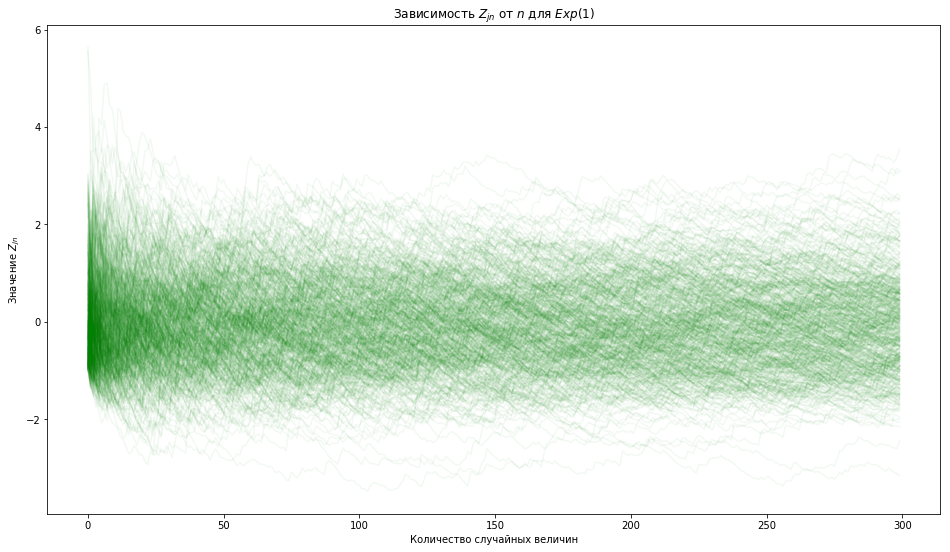

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(Z.T, color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{j n}$')
plt.title('Зависимость $Z_{jn}$ от $n$ для $Exp(1)$')
plt.show()

**Вывод:** Из графика видно, что $Z_{jn}$ не сходится к константе 

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

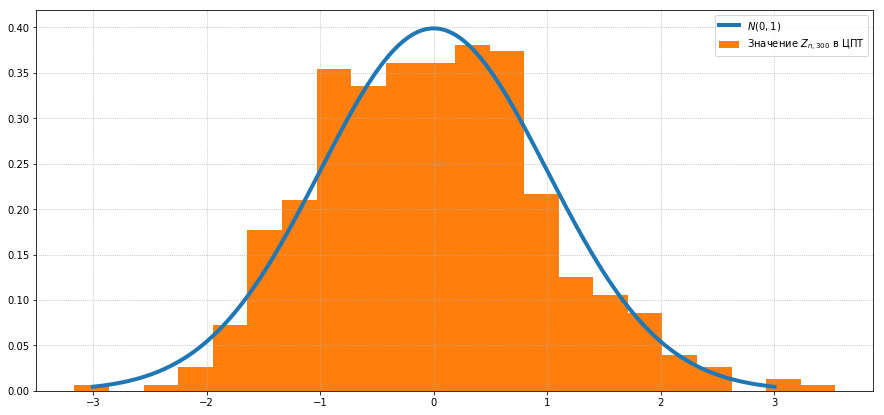

In [6]:
grid = np.linspace(-3,3,200)

plt.figure(figsize=(15, 7))

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    linewidth=4, 
    label='$N(0,1)$'
)

plt.hist(
    Z[:, size[1] - 1], 
    bins=22, 
    density=True, 
    label='Значение $Z_{n, 300}$ в ЦПТ'
)

plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Легко видеть, что наш набор описывается стандартным нормальным распределением.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

### $U(0, 1)$ :

In [7]:
uniform_var = sps.uniform().rvs(size=size)

In [8]:
cum_sum = uniform_var.cumsum(axis=1)

In [9]:
mean = np.arange(1, size[1] + 1) * sps.uniform.mean() 
disp = np.sqrt(np.arange(1, size[1] + 1) * sps.uniform.var())

Z = (cum_sum - mean) / disp

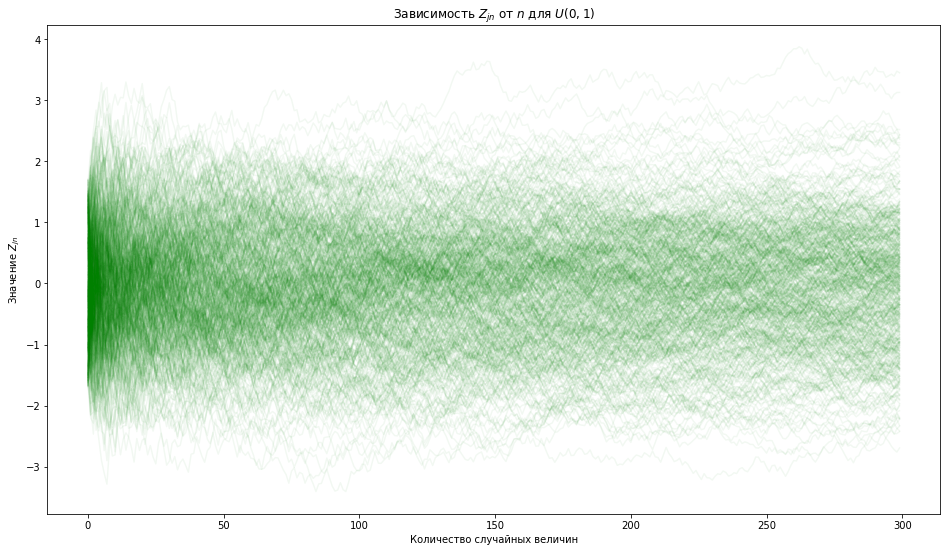

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(Z.T, color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{j n}$')
plt.title('Зависимость $Z_{jn}$ от $n$ для $U(0, 1)$')
plt.show()

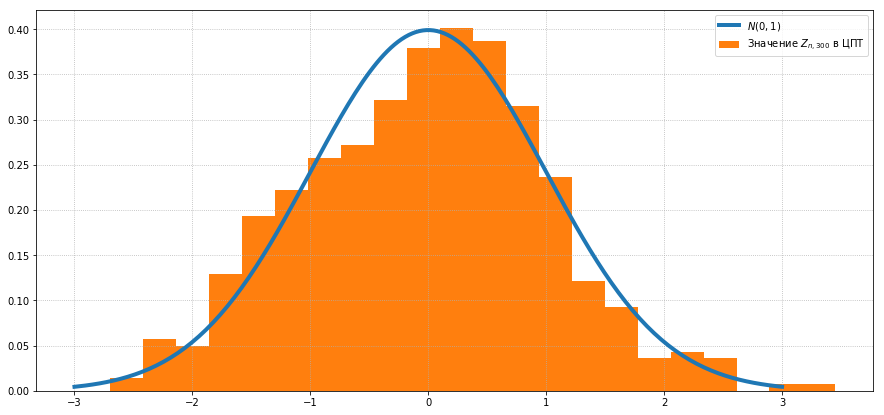

In [11]:
grid = np.linspace(-3,3,200)

plt.figure(figsize=(15, 7))

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    linewidth=4, 
    label='$N(0,1)$'
)

plt.hist(
    Z[:, size[1] - 1], 
    bins=22, 
    density=True, 
    label='Значение $Z_{n, 300}$ в ЦПТ'
)

plt.legend()
plt.grid(ls=':')
plt.show()

### $Pois(1)$ :

In [12]:
pois_var = sps.poisson.rvs(mu=1, size=size)
cum_sum = pois_var.cumsum(axis=1)

mean = np.arange(1, size[1] + 1) * sps.poisson(mu=1).mean() 
disp = np.sqrt(np.arange(1, size[1] + 1) * sps.poisson(mu=1).var())

Z = (cum_sum - mean) / disp

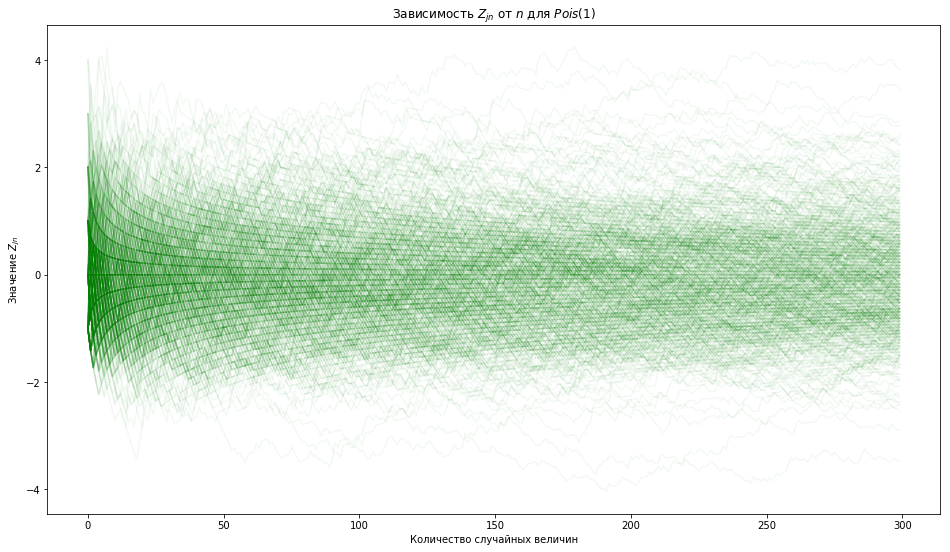

In [13]:
plt.figure(figsize=(16, 9))
plt.plot(Z.T, color='green', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{j n}$')
plt.title('Зависимость $Z_{jn}$ от $n$ для $Pois(1)$')
plt.show()

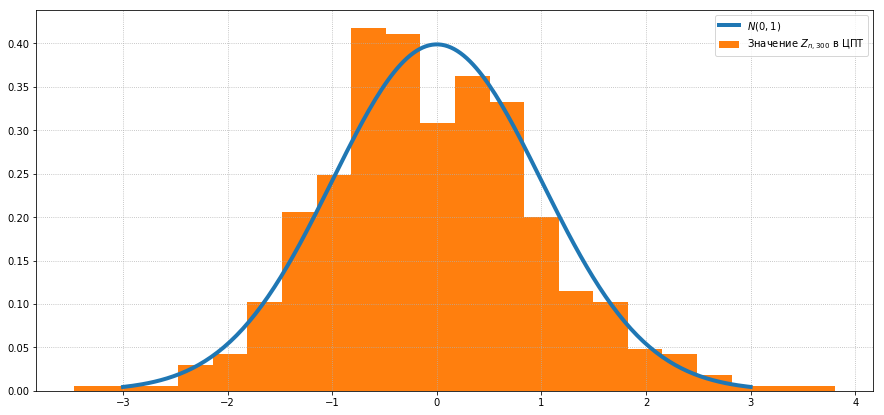

In [14]:
grid = np.linspace(-3,3,200)

plt.figure(figsize=(15, 7))

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    linewidth=4, 
    label='$N(0,1)$'
)

plt.hist(
    Z[:, size[1] - 1], 
    bins=22, 
    density=True, 
    label='Значение $Z_{n, 300}$ в ЦПТ'
)

plt.legend()
plt.grid(ls=':')
plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** Вместо суммы независимых одинаково распределённых случайных величин(вычитая из них их мат. ожидание и деля на корень из дисперсии) можно пользоваться стандартным нормальным распределением. Построенные графики пресрасно показывают это. 

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Bern(1/2)$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [15]:
size = (500,300)
random_var = sps.uniform(-1, 2).rvs(size)

cum_sum = random_var.cumsum(axis=1)


Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

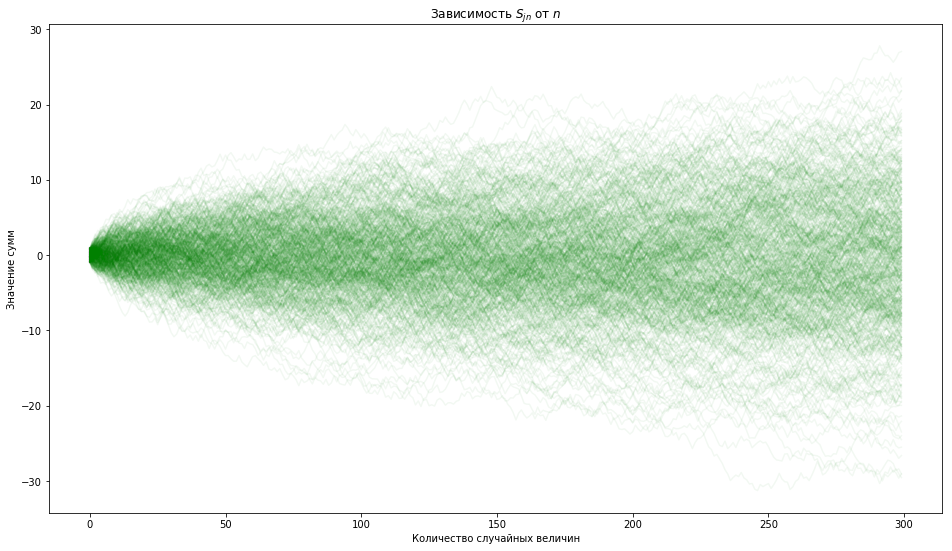

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(cum_sum.T, color='green', alpha=0.05)
plt.title('Зависимость $S_{jn}$ от $n$')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение сумм')
plt.show()

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте графих доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

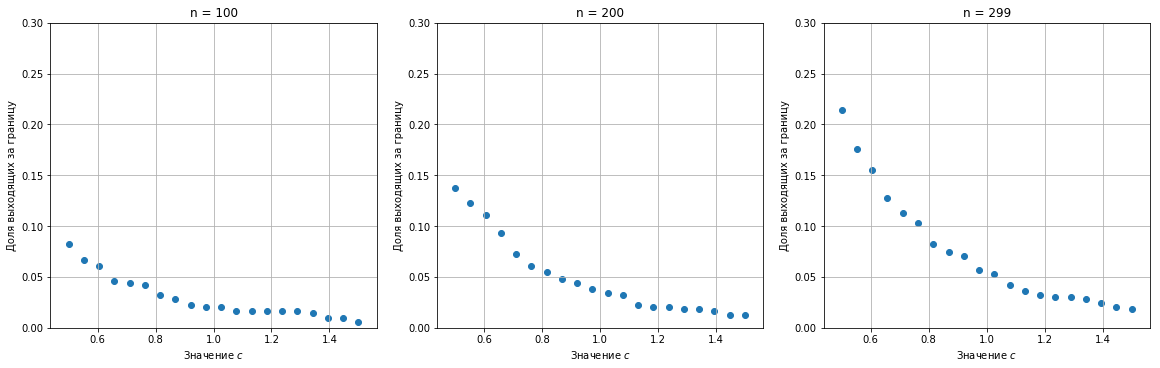

In [17]:
num_c = 20
c = np.vstack(np.linspace(0.5, 1.5, num_c))
border = c * np.sqrt(2 * np.arange(5,501) * np.log(np.log(np.arange(5, 501))))
# начинаем с 5, чтобы не возникало ln(0) 

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, constrained_layout=True, figsize=(16, 5))
for n, ax in zip([100, 200, 299], [ax0, ax1, ax2]):
    ax.scatter(c, (np.sum(cum_sum[4:, n] > border, axis=1) + np.sum(cum_sum[4:, n] < -border, axis=1)) / 495)
    # причина таких срезов указана выше
    ax.set_ylim(0, 0.3)
    ax.grid()
    ax.set_ylabel('Доля выходящих за границу')
    ax.set_xlabel('Значение $c$')
    ax.title.set_text('n = {}'.format(n))

Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** закон повторного логарифма гарантирует, что величина $\sqrt{2n\log\log n}$ устанавливает границу "разброса" сумм $S_{j,n}$. То есть мы можем быть уверены, что оснавная часть $S_{j,n}$ лежит внутри этой огибающей. 
Из графиков видно, что это верно. 

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

### 1) Цель исследования:

Я хочу рассмотреть топ фильмов Кинопоиска. 
* Попробуем понять, влияет ли год выпуска или продолжительность фильма на интерес к нему. Интерес будем выражать в кол-ве оценок. 
* Посмотрим на самых высокооцениваемых режиссеров и узнаем, есть ли тенденция роста качества фильмов. 
* Проверим, правда ли, что раньше было лучше. 

### 2) Получение данных:

Я решил распарсить топ Кинопоиска. Сам парсер лежит в файле parser.
Проблемы, с которыми я столкнулся:
* Кинопоиск не тупой и не позволяет просто так выкачивать данные. После пары запросов он выдаёт капчу(((
* Простые попытки обойти это путём прописывания cookie или использование proxy не увенчались успехом(мне стало лень). Но если ты ведёшь какую-то пользовательскую деятельность(переходишь по вкладкам), то он не так быстро распознаёт в тебе жулика. Поэтому хотелось бы проверить, как быстро он будет тебя расспозновать, если ты рандомно открываешь какие-то вкладки на страницах.  

### 3) Посмотрим на выкаченные данные. 

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv('data.csv')
data.head()

,name,rating,views,время,год,режиссер,страна
0,Побег из Шоушенка,9.111,693 385,142 мин. / 02:22,1994,Фрэнк Дарабонт,США
1,Зеленая миля,9.062,594 470,189 мин. / 03:09,1999,Фрэнк Дарабонт,США
2,Форрест Гамп,8.913,561 423,142 мин. / 02:22,1994,Роберт Земекис,США
3,Список Шиндлера,8.818,323 887,195 мин. / 03:15,1993,Стивен Спилберг,США
4,1+1,8.807,1 006 352,112 мин. / 01:52,2011,Оливье Накаш,Франция


In [20]:
data.info()
data['views'][3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
name        219 non-null object
rating      219 non-null float64
views       219 non-null object
время       219 non-null object
год         219 non-null int64
режиссер    219 non-null object
страна      219 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 12.1+ KB


'323\xa0887'

Преобразуем их к удобному формату. 

In [21]:
data['views'] = data['views'].apply(lambda x: int(x.replace('\xa0', ''), base=10))
data['время'] = data['время'].apply(lambda x: int(x.split()[0]))
data.head()

,name,rating,views,время,год,режиссер,страна
0,Побег из Шоушенка,9.111,693385,142,1994,Фрэнк Дарабонт,США
1,Зеленая миля,9.062,594470,189,1999,Фрэнк Дарабонт,США
2,Форрест Гамп,8.913,561423,142,1994,Роберт Земекис,США
3,Список Шиндлера,8.818,323887,195,1993,Стивен Спилберг,США
4,1+1,8.807,1006352,112,2011,Оливье Накаш,Франция


In [22]:
data = data.rename(columns={
    'views' : 'count_voices', 
    'время':'duration',
    'режиссер' : 'director', 
    'год' : 'year',
    'страна' : 'country'
})
data.head()

,name,rating,count_voices,duration,year,director,country
0,Побег из Шоушенка,9.111,693385,142,1994,Фрэнк Дарабонт,США
1,Зеленая миля,9.062,594470,189,1999,Фрэнк Дарабонт,США
2,Форрест Гамп,8.913,561423,142,1994,Роберт Земекис,США
3,Список Шиндлера,8.818,323887,195,1993,Стивен Спилберг,США
4,1+1,8.807,1006352,112,2011,Оливье Накаш,Франция


Сделаем простые визуализации. 

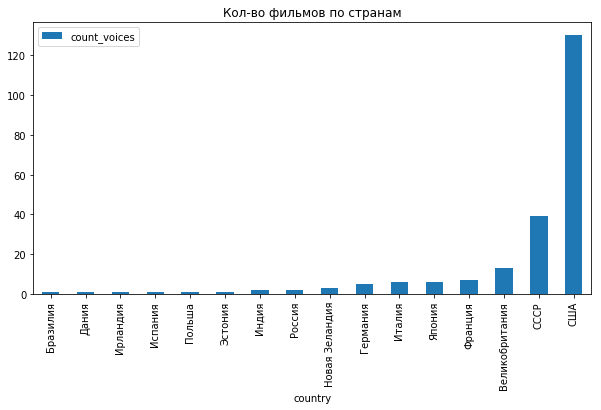

In [23]:
data.groupby('country', as_index=False).count().\
    sort_values('count_voices').\
    plot.bar('country', 'count_voices', figsize=(10,5), title='Кол-во фильмов по странам')

/home/anton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


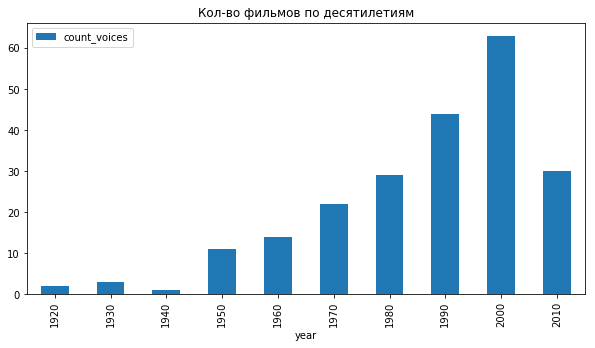

In [24]:
decade = data[['count_voices', 'year']]
decade['year'] -= (decade['year'] % 10)
decade.groupby('year', as_index=False).count().\
    plot.bar('year', 'count_voices', figsize=(10,5), title='Кол-во фильмов по десятилетиям')

/home/anton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


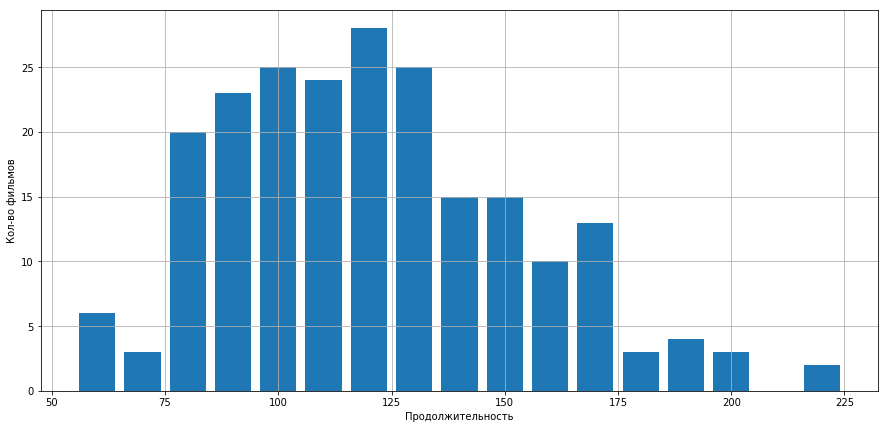

In [25]:
dur = data[['count_voices', 'duration']]
dur['duration'] -= (dur['duration'] % 10) 
dur = dur.groupby(by='duration', as_index=False).count()

plt.figure(figsize=(15, 7))

plt.bar(
    dur['duration'],
    dur['count_voices'],
    8
)
plt.ylabel('Кол-во фильмов')
plt.xlabel('Продолжительность')
plt.grid()
plt.show()

Фильмы с наибольшим числом оценок

In [26]:
data.sort_values('count_voices', ascending=False).head(10)

,name,rating,count_voices,duration,year,director,country
4,1+1,8.807,1006352,112,2011,Оливье Накаш,Франция
0,Побег из Шоушенка,9.111,693385,142,1994,Фрэнк Дарабонт,США
5,Начало,8.662,665035,148,2010,Кристофер Нолан,США
9,Иван Васильевич меняет профессию,8.782,598220,88,1973,Леонид Гайдай,СССР
1,Зеленая миля,9.062,594470,189,1999,Фрэнк Дарабонт,США
16,Интерстеллар,8.592,565888,169,2014,Кристофер Нолан,США
2,Форрест Гамп,8.913,561423,142,1994,Роберт Земекис,США
102,Брат,8.231,544639,100,1997,Алексей Балабанов,Россия
8,Бойцовский клуб,8.644,540382,139,1999,Дэвид Финчер,США
193,Аватар,7.938,508296,162,2009,Джеймс Кэмерон,США


### 4) Начнём проверять теории. 

*Зависимость интереса к фильму от его года выпуска.*

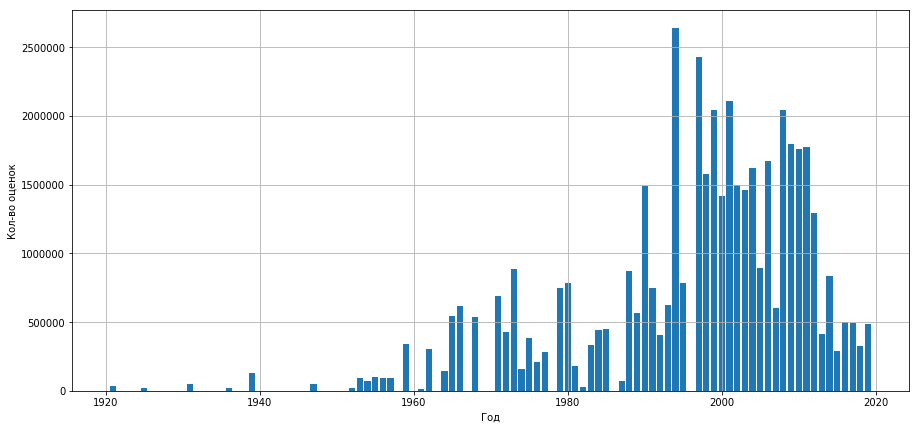

In [27]:
tmp = data[['count_voices', 'year']].groupby(by='year', as_index=False).sum().sort_values(by='count_voices')

plt.figure(figsize=(15, 7))

plt.bar(
    tmp['year'],
    tmp['count_voices'], 
)
plt.ylabel('Кол-во оценок')
plt.xlabel('Год')
plt.grid()
plt.show()

"Сгладим" наш график, разбив данные на временные промежутки по 5 лет.

/home/anton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


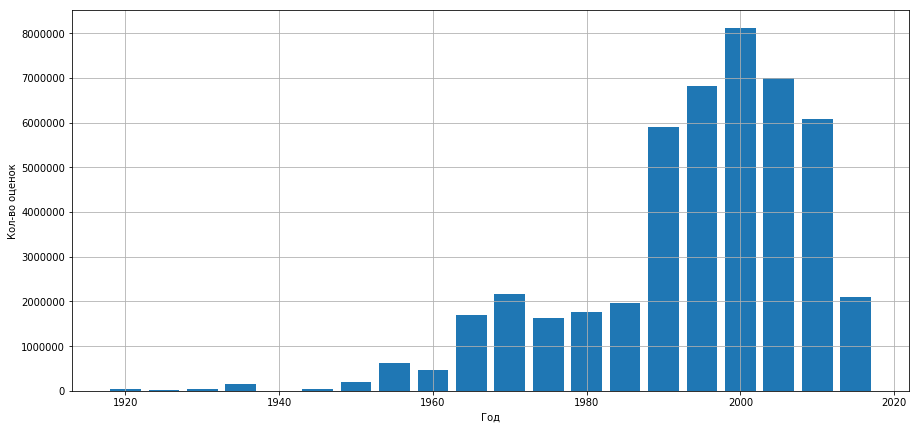

In [28]:
decade = data[['count_voices', 'year']]
decade['year'] -= (decade['year'] % 5)
decade = decade.groupby(by='year', as_index=False).sum().sort_values(by='count_voices')

plt.figure(figsize=(15, 7))

plt.bar(
    decade['year'],
    decade['count_voices'],
    4
)
plt.ylabel('Кол-во оценок')
plt.xlabel('Год')
plt.grid()
plt.show()

**Вывод:** пользователи предпочитают "современные" фильмы(новее 80-х). Такое поведение графика может быть связано с тем, что у нас в топе меньше старых фильмов. Но это только добавляет уверенности в том, что пользователи предпочитают современное кино.   

*Зависимость интереса к фильму от его продолжительности.*

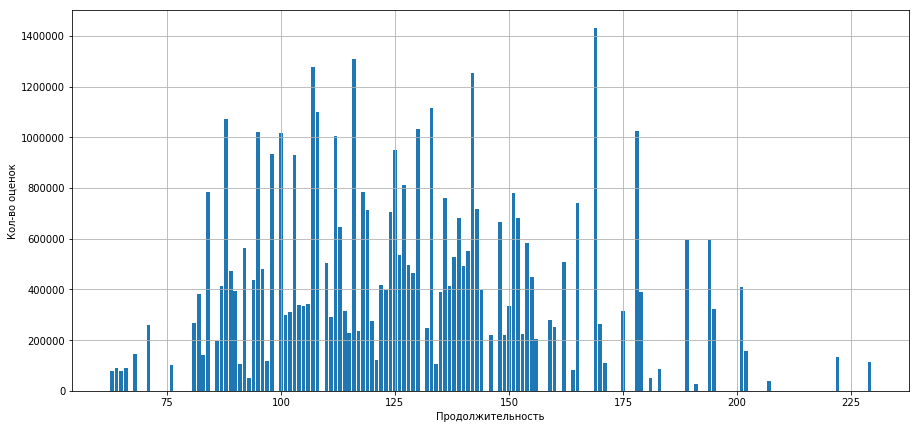

In [29]:
tmp = data[['count_voices', 'duration']].groupby(by='duration', as_index=False).sum().sort_values(by='count_voices')

plt.figure(figsize=(15, 7))

plt.bar(
    height=tmp['count_voices'], 
    x=tmp['duration'],
)
plt.ylabel('Кол-во оценок')
plt.xlabel('Продолжительность')
plt.grid()
plt.show()

Также, как и в прошлый раз, сгладим график.

/home/anton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


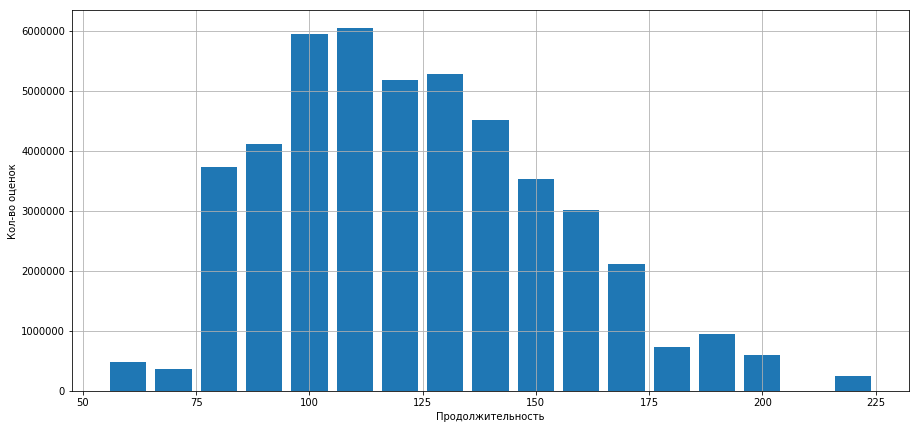

In [30]:
dur = data[['count_voices', 'duration']]
dur['duration'] -= (dur['duration'] % 10) 
dur = dur.groupby(by='duration', as_index=False).sum().sort_values(by='count_voices')

plt.figure(figsize=(15, 7))

plt.bar(
    dur['duration'],
    dur['count_voices'],
    8
)
plt.ylabel('Кол-во оценок')
plt.xlabel('Продолжительность')
plt.grid()
plt.show()

**Вывод:** кажется, что можно сделать вывод, что пользователи предпочитают не сильно долгие фильмы. Но это скорее связано с тем, что почти все фильмы имеют продолжительность полтара-три часа. Причём опять трудно судить, это пользователи не любят долгие фильмы, или режиссёры не снимают долгие фильмы. На такой маленькой выборке трудно дедать выводы.

*Проверка влияние опыта режиссёра на оценку(то есть зависимость какой его фильм в топе по счёту получил какую оценку).*

Пример: у режиссёра 5 фильмов в топе. Первым он выпистил фильм $f_1$, а поледним $f_5$. Мы хотим построить зависимость $f_n(rating_n)$.

In [31]:
data.groupby(by='director', as_index=False).count().sort_values(by='name', ascending=False).head(10)


,director,name,rating,count_voices,duration,year,country
45,Игорь Масленников,7,7,7,7,7,7
64,Леонид Гайдай,5,5,5,5,5,5
99,Роберт Земекис,5,5,5,5,5,5
59,Кристофер Нолан,5,5,5,5,5,5
87,Питер Джексон,4,4,4,4,4,4
18,Гай Ричи,4,4,4,4,4,4
73,Мартин Скорсезе,4,4,4,4,4,4
116,Стивен Спилберг,4,4,4,4,4,4
139,Чарльз Чаплин,4,4,4,4,4,4
52,Квентин Тарантино,3,3,3,3,3,3


In [32]:
best_dir = data.groupby(by='director', as_index=False).\
    count().sort_values(by='name', ascending=False)['director'][:6].to_numpy()
best_dir

array(['Игорь Масленников', 'Леонид Гайдай', 'Роберт Земекис',
       'Кристофер Нолан', 'Питер Джексон', 'Гай Ричи'], dtype=object)

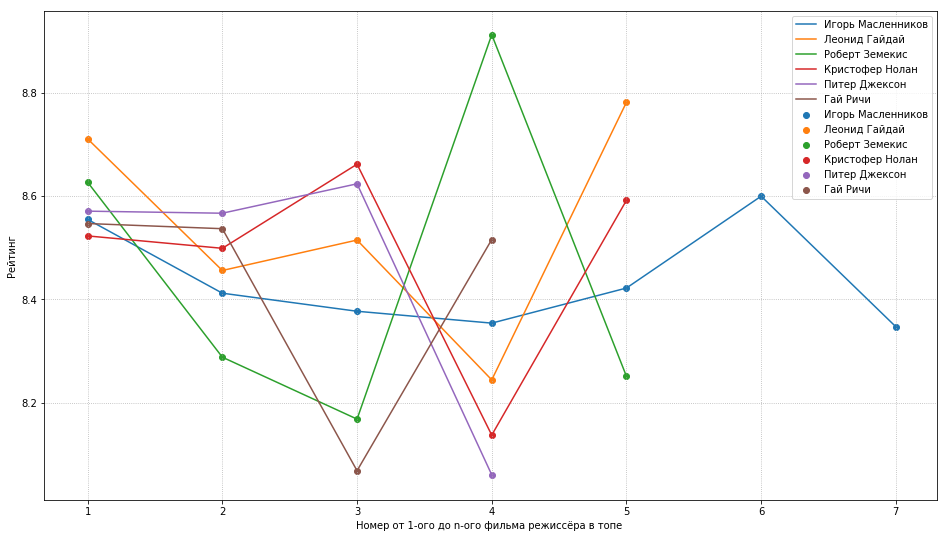

In [33]:
plt.figure(figsize=(16, 9))

tmp = data.sort_values(by='year')

for director in best_dir:
    x=np.arange(1, len(tmp[tmp['director']==director]['rating'])+1)
    y=tmp[tmp['director']==director]['rating']
    plt.scatter(
        x,
        y,
        label=director
    )
 
    plt.plot(
        x,
        y,
        label=director
    )
    
plt.xlabel('Номер от 1-ого до n-ого фильма режиссёра в топе ')
plt.ylabel('Рейтинг')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** нету каких-то зависимостей рейтинга фильма, от порядка его выпуска. То есть с годами не обязательно фильмы у режиссёров становятся только лучше(по мнению зрителей). Намного интереснее было бы провести такое же исследование для всех фильмов лучших режиссёров, а не только для фильмов попавших в топ.  

*Раньше было лучше!!!*

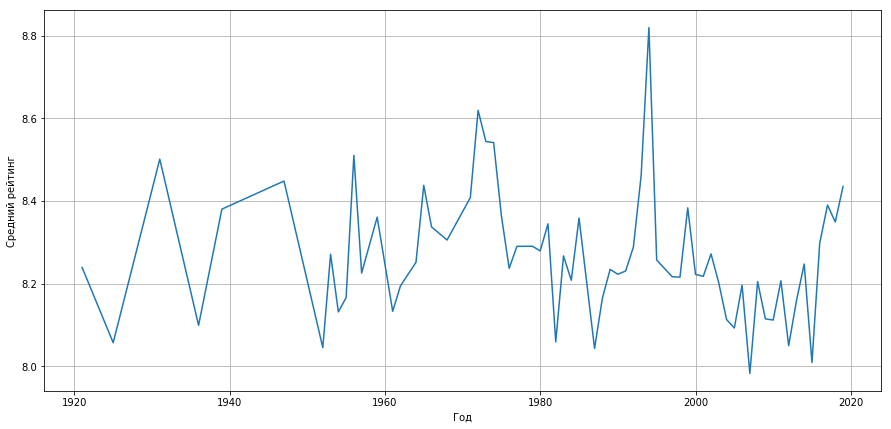

In [34]:
tmp = data[['rating', 'year']].groupby(by='year', as_index=False).mean()

plt.figure(figsize=(15, 7))

plt.plot(
    tmp['year'],
    tmp['rating'], 
)
plt.ylabel('Средний рейтинг')
plt.xlabel('Год')
plt.grid()
plt.show()

/home/anton/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


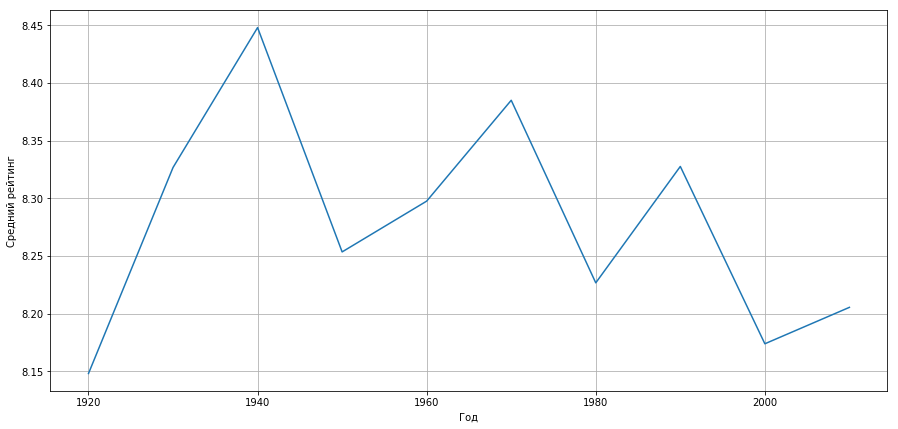

In [35]:
decade = data[['rating', 'year']]
decade['year'] -= (decade['year'] % 10)
decade = decade.groupby(by='year', as_index=False).mean()

plt.figure(figsize=(15, 7))

plt.plot(
    decade['year'],
    decade['rating'],
)
plt.ylabel('Средний рейтинг')
plt.xlabel('Год')
plt.grid()
plt.show()

**Вывод:** Можно сказать, что и вправду раньше было лучше. Но стоит помнить, что старых фильмов значительно меньше. 

### Вывод: 
Очевидно, что 200 фильмов из топа не достаточно для анализа, так как трудно делать какие-то выводы на маленькой выборке. Стоило бы сделать исследование на 2000, а то и 10000 фильмов. Но для этого нужно обойти капчу Кинопоиска, потратив на это ещё какое-то кол-во времени(((  

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?

**Лекция 5 марта**

In [36]:
xd = pd.read_excel('Данные к ДЗ 3/Лекция 5 марта.xlsx')

In [37]:
xd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 3 columns):
Отметка времени    829 non-null datetime64[ns]
Группа             829 non-null object
Фамилия Имя        829 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 19.5+ KB


In [38]:
xd

,Отметка времени,Группа,Фамилия Имя
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений
1,2020-03-05 19:17:02.696,825,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима
3,2020-03-05 19:17:03.192,824,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий
5,2020-03-05 19:17:05.699,821,Наговицин Марк
6,2020-03-05 19:17:06.558,825,Халилов Адель
7,2020-03-05 19:17:07.858,824,Клочко Анастасия
8,2020-03-05 19:17:07.976,826,Голяр Димитрис
9,2020-03-05 19:17:08.123,827,Васильев Николай


In [39]:
xd = xd.rename(columns={
    'Отметка времени' : 'time_point', 
    'Группа':'group',
    'Фамилия Имя' : 'name'
})
xd['time_point'] = xd['time_point'].astype('datetime64[s]')

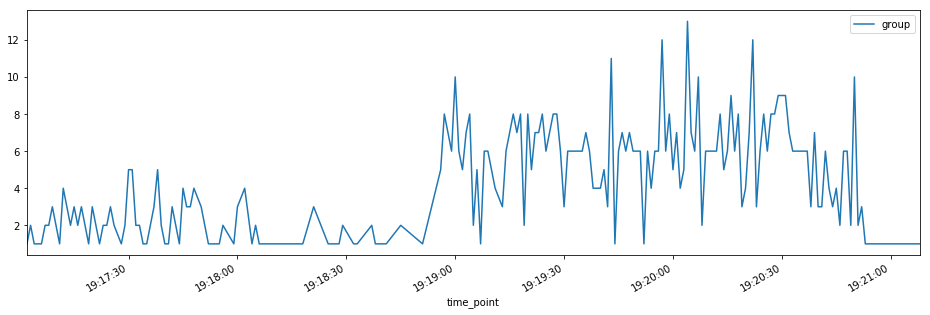

In [40]:
xd.groupby('time_point', as_index=False).count()[1:-10].plot('time_point', 'group', figsize=(16,5))

К сожалению, мне лень составлять/искать список всех учащихся, поэтому обойдёмся удалением спамерского промежутка.   

In [41]:
correct = np.concatenate((np.arange(143), np.arange(817, 829)), axis=0)
correct_data = xd.iloc[correct]
correct_data.to_csv('5_march.csv')
len(correct_data)

155

**Вывод:** здесь, к сожалению, можно только отсечь спамерскую атаку целиком(она отчётливо видна на графике), те удалив промежуток времени со всеми запясими. Ну и, конечно, стоит проверить учится ли человек на курсе. 

**Лекция 27 апреля**

In [42]:
xd2 = pd.read_excel('Данные к ДЗ 3/Лекция 30 апреля.xlsx')

In [43]:
xd2

,Отметка времени,ФИО,Группа
0,2020-04-30 19:18:38.415,Астафуров Евгений Олегович,812
1,2020-04-30 19:18:41.251,Севец Владислав Сергеевич,Б05-825
2,2020-04-30 19:18:41.327,Голяр Димитрис Георгиевич,Б05-826
3,2020-04-30 19:18:42.195,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823
4,2020-04-30 19:18:42.683,Богданов Сергей Владимирович,Б05-821
5,2020-04-30 19:18:42.965,Наговицин Марк Сергеевич,Б05-821
6,2020-04-30 19:18:43.989,Купцов Дмитрий Андреевич,814
7,2020-04-30 19:18:44.155,Клещев Максим,814
8,2020-04-30 19:18:44.740,Николаев Александр Викторович,Б05-825
9,2020-04-30 19:18:45.249,Халилов Адель Маратович,Б05-825


In [44]:
xd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 3 columns):
Отметка времени    2465 non-null datetime64[ns]
ФИО                2463 non-null object
Группа             2463 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 57.9+ KB


In [45]:
xd2 = xd2.rename(columns={
    'Отметка времени' : 'time_point', 
    'Группа':'group',
    'ФИО' : 'name'
})
xd2['time_point'] = xd2['time_point'].astype('datetime64[s]')

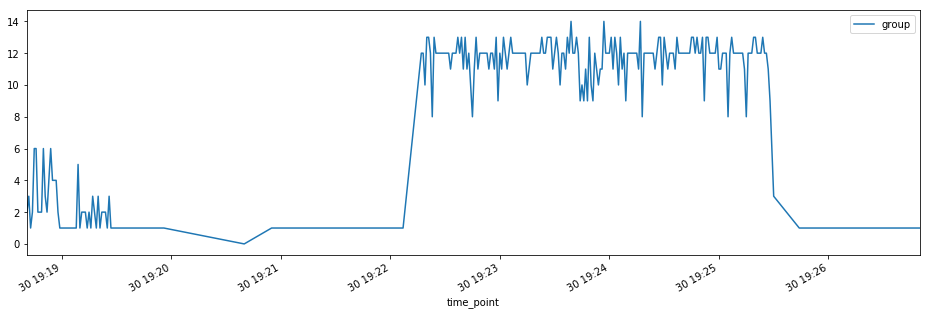

In [46]:
xd2.groupby('time_point', as_index=False).count()[1:-70].plot('time_point', 'group', figsize=(16,5))

In [47]:
correct2 = np.concatenate((np.arange(116), np.arange(2386, 2465)), axis=0)
correct_data2 = xd2.iloc[correct2]
correct_data2 = correct_data2[correct_data2['name'] != 'Редкозубов Вадим Витальевич']
correct_data2.to_csv('27_april.csv')
len(correct_data2)

132

**Вывод:** Смотря на данные, легко видеть, что спамовые записи состоят из имени и фамилии. Причём они состоят из рандомных пар фамилии и имени учащихся на курсе, поэтому можно проверять учится ли такой человек на курсе.
Также из графика видно, когда началась спам атака. 
Ещё стоит проверять корректно ли написана группа. 

Поэтому для хвоста можно применить правило, если ФИО из 2 слов и такого человека нет в списках, или поле группа не адекватное, или человека просто нет в списках, то запись является спамовой.